In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
#loading the dataset
data = pd.read_csv('netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [122]:
data.shape

(8807, 12)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [126]:
#calculating the total null values / missing values across the columns
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [125]:
# updating the null values with string Unknown.
data[['cast','director','country']] = data[['cast','director','country']].fillna('Unknown')

data[['rating','duration']] = data[['rating','duration']].fillna('NA')

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [127]:
#Converting the Series with data type object to datetime
data['date_added'] = pd.to_datetime(data['date_added'])
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [129]:
# Creating a new column to store the name of the month from the converted date_added column and updating the null values / Missing values with the passed string 'January'
data['month'] = data['date_added'].dt.month_name().fillna('January')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


In [131]:
# we're performing here unnesting i.e; converting the nested data of categorical values across column into multiple rows
cast = data['cast'].apply(lambda x: str(x).split(', ')).to_list()

data_cast = pd.DataFrame(cast,index=data['title'])

data_cast = data_cast.stack()

data_cast = pd.DataFrame(data_cast)

data_cast.reset_index(inplace=True)

data_cast = data_cast[['title',0]]

data_cast.columns = ['title','cast']

data_cast

,title,cast
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [132]:
director = data['director'].apply(lambda x: str(x).split(', ')).to_list()

data_director = pd.DataFrame(director,index=data['title'])

data_director = data_director.stack()

data_director = pd.DataFrame(data_director)

data_director.reset_index(inplace=True)

data_director = data_director[['title',0]]

data_director.columns = ['title','director']

data_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown
4,Kota Factory,Unknown
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,Unknown
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [133]:
country = data['country'].apply(lambda x: str(x).split(', ')).to_list()

data_country = pd.DataFrame(country,index=data['title'])

data_country = data_country.stack()

data_country = pd.DataFrame(data_country)

data_country.reset_index(inplace=True)

data_country = data_country[['title',0]]

data_country.columns = ['title','country']

data_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown
3,Jailbirds New Orleans,Unknown
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,Unknown
10842,Zombieland,United States
10843,Zoom,United States


In [134]:
genre = data['listed_in'].apply(lambda x: str(x).split(', ')).to_list()

data_genre = pd.DataFrame(genre,index = data['title'])

data_genre = data_genre.stack()

data_genre = pd.DataFrame(data_genre)

data_genre.reset_index(inplace=True)

data_genre = data_genre[['title',0]]

data_genre.columns = ['title','listed_in']

data_genre

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [135]:
# we're merging the above individual tables with unique key 'title'
merged_data = data_cast.merge(data_director,on='title').merge(data_country,on='title').merge(data_genre,on='title')
merged_data

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,Unknown,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,Unknown,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,Unknown,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [136]:
# we're merging the previously merged data with the original dataset and the resultant will now have no nested values across the columns.
final_data = merged_data.merge(data[['show_id','type','title','date_added','release_year','rating','duration','description','month']],
                             on='title',how='right')
final_data

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,month
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
2,Blood & Water,Ama Qamata,Unknown,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
3,Blood & Water,Ama Qamata,Unknown,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
4,Blood & Water,Khosi Ngema,Unknown,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March


In [162]:
# we're grouping the data by column type and fetching the respective group by get_group() and calculating the unique counts of data values in listed_in column
movie_genre_grp = final_data.groupby('type').get_group('Movie')['listed_in'].value_counts()

# we're creating a new dataframe 
movie_genre = pd.DataFrame(movie_genre_grp)

# we're reseting the index as index was set to listed_in column
movie_genre.reset_index(inplace=True)

#we're renaming the columns which were earlier index and listed_in respectively
movie_genre.columns = ['listed_in','count']

# retrieving the top 10 rows
top_movie_genre = movie_genre.head(10)

top_movie_genre

,listed_in,count
0,Dramas,29775
1,International Movies,28211
2,Comedies,20829
3,Action & Adventure,12216
4,Independent Movies,9834
5,Children & Family Movies,9771
6,Thrillers,7107
7,Romantic Movies,6412
8,Horror Movies,4571
9,Sci-Fi & Fantasy,4037


In [163]:
# we're grouping the data by column type and fetching the respective group by get_group() and calculating the unique counts of data values in listed_in column
tv_genre_grp = final_data.groupby('type').get_group('TV Show')['listed_in'].value_counts()

# we're creating a new dataframe 
tv_genre = pd.DataFrame(tv_genre_grp)

# we're reseting the index as index was set to listed_in column
tv_genre.reset_index(inplace=True)

#we're renaming the columns which were earlier index and listed_in respectively
tv_genre.columns = ['listed_in','count']

# retrieving the top 10 rows
top_tv_genre = tv_genre.head(10)

top_tv_genre

,listed_in,count
0,International TV Shows,12845
1,TV Dramas,8942
2,TV Comedies,4963
3,Crime TV Shows,4733
4,Kids' TV,4568
5,Romantic TV Shows,3049
6,Anime Series,2313
7,TV Action & Adventure,2288
8,Spanish-Language TV Shows,2126
9,British TV Shows,1808


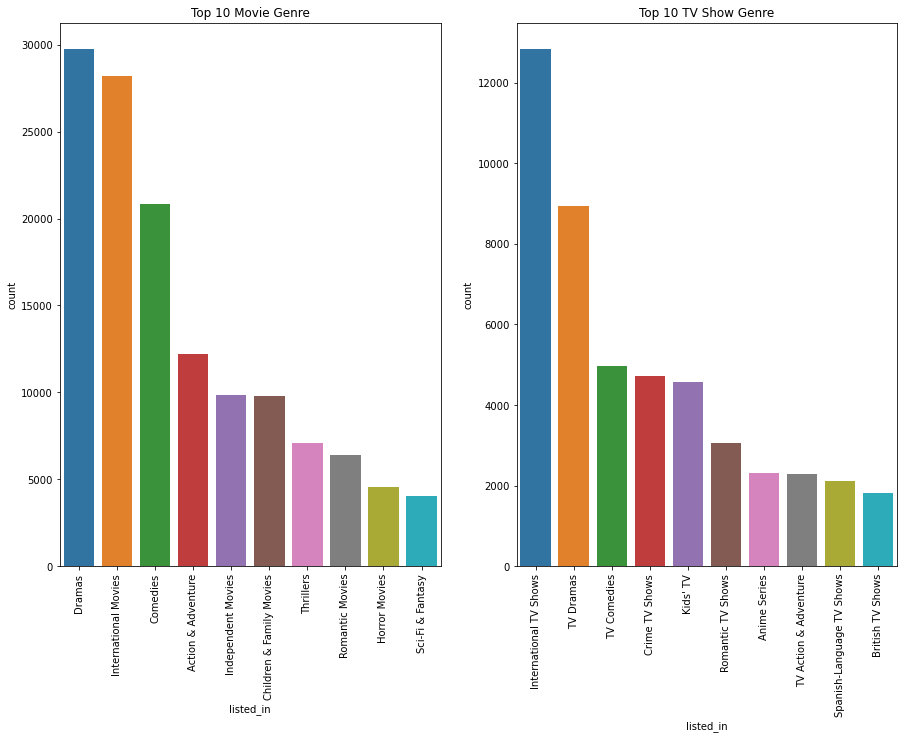

In [421]:
# we're setting the figure size
plt.figure(figsize=(15,10))

# we're creating a subplot so as to show the subsequent plots in the same figure
plt.subplot(1,2,1)
# Adding the title to figure
plt.title('Top 10 Movie Genre')
# we're rotating the xticks to 90 degree else they will be overlapped and won't be convineint to analyze
plt.xticks(rotation=90)
# we have used barplot to plot the listed_in column and its respective count for each unique data value of type movie
sns.barplot(x='listed_in',y='count',data=top_movie_genre)

# we're creating a subplot and positioning it at position 2
plt.subplot(1,2,2)
# Adding the title to figure
plt.title('Top 10 TV Show Genre')
# we're rotating the xticks to 90 degree
plt.xticks(rotation=90)
# we have used barplot to plot the listed_in column and its respective count for each unique data value of type TV Show
sns.barplot(x='listed_in',y='count',data=top_tv_genre)

plt.show()

In [171]:
# we're looking here for number of movies released each year
# we're grouping the data by column type and fetching the respective group by get_group() and calculating the unique counts of data values in release_year column
movie_release_grp = final_df.groupby('type').get_group('Movie')['release_year'].value_counts()

# we're creating a DataFrame
movie_release = pd.DataFrame(movie_release_grp)

# we're reseting the index as index was set to release_year column
movie_release.reset_index(inplace=True)

# we're renaming the columns which were earlier index and release_year respectively
movie_release.columns = ['release_year','number of movies released']

movie_release

,release_year,number of movies released
0,2018,17033
1,2017,15069
2,2016,14075
3,2019,11926
4,2015,10612
...,...,...
68,1945,12
69,1947,8
70,1942,6
71,1943,5


In [193]:
# we're looking for number of TV shows for each year
# we're grouping the data by column type and fetching the respective group by get_group() and calculating the unique counts of data values in release_year column
tv_release_grp = final_df.groupby('type').get_group('TV Show')['release_year'].value_counts()

# we're creating a DataFrame
tv_release = pd.DataFrame(tv_release_grp)

# we're reseting the index as index was set to release_year column
tv_release.reset_index(inplace=True)

# we're renaming the columns which were earlier index and release_year respectively
tv_release.columns = ['release_year','number of tv shows released']

# retrieving the top 10 records
tv_release.head(10)

,release_year,number of tv shows released
0,2020,10089
1,2019,10005
2,2018,7381
3,2021,6467
4,2017,5447
5,2016,4390
6,2015,3516
7,2014,1454
8,2013,1223
9,2012,1077


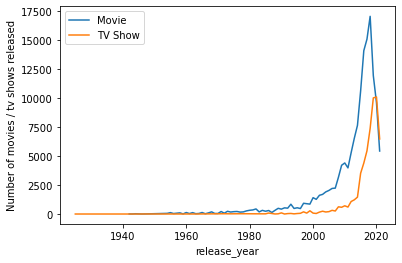

In [197]:
# Bivariate Analysis :
# we're plotting a lineplot where x axis is the release_year column and y axis as the count of number of movies released
sns.lineplot(x = 'release_year',y='number of movies released',data=movie_release)

# we're plotting a lineplot where x axis is the release_year column and y axis as the count of number of tv shows released
sns.lineplot(x = 'release_year',y='number of tv shows released',data=tv_release)

# naming the label for y axis 
plt.ylabel('Number of movies / tv shows released')

# highlighting the movie and tv show respective line plot with legend()
plt.legend(['Movie','TV Show'],loc = 'upper left')
plt.show()

In [173]:
# counting the unique data value for the type column
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

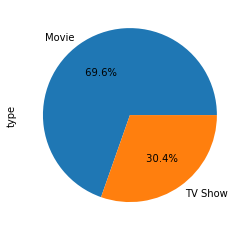

In [174]:
# plotting a pie plot to compare the TV show and the movies 
data['type'].value_counts().plot.pie(autopct='% 0.1f%%')
plt.show()

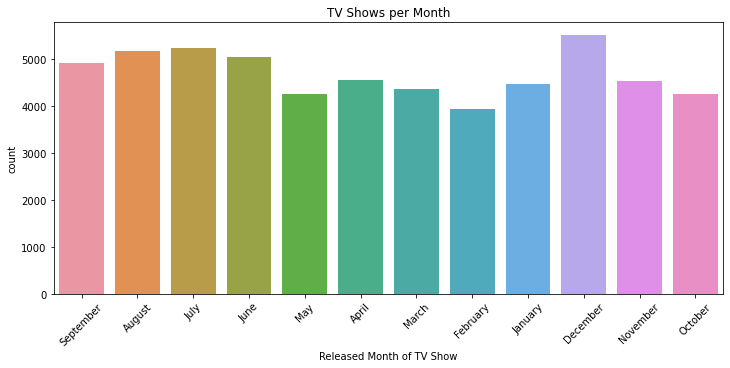

In [442]:
# we're looking to analyze the number of TV show released each month
# we have grouped the data by type column and fetch the TV Show group by get_group()
tv_month_grp = final_df.groupby('type').get_group('TV Show')

# we're setting the figure size as (12,8) where 12 is the width and 8 is the height
plt.figure(figsize=(12,5))

# Giving name to the figure
plt.title('TV Shows per Month')

# Univariate Analysis:
# plotting a count plot which will take a categorical value on x axis 
sns.countplot(x='month',data=tv_month_grp)

# we're rotating the xticks to 45 degree
plt.xticks(rotation=45)

# we're labelling the x axis 
plt.xlabel('Released Month of TV Show')

plt.show()

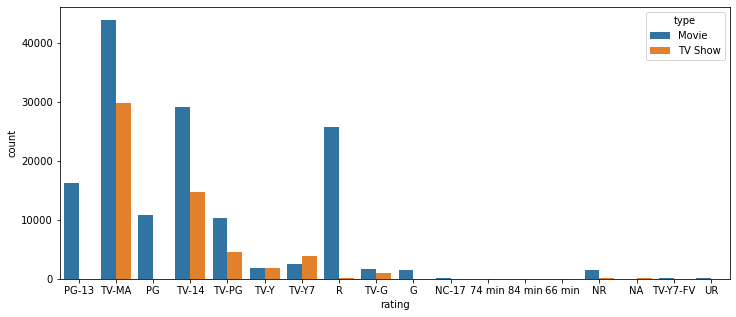

In [441]:
plt.figure(figsize=(12,5))
# we're plotting a countplot for the TV Show and Movie rating and mentioned the rating column as x axis
sns.countplot(x='rating',data=final_data,hue='type')
plt.show()

In [93]:
# we're grouping the cast and director column to figure out the different genres / listed_in they have worked together and showing the total as number of shows they have worked.
cast_dir = final_df.groupby(['cast','director'])['listed_in'].agg(total_shows=('count')).reset_index()
cast_dir

,cast,director,total_shows
0,Jr.,Sam Macaroni,1
1,Jr.,Unknown,1
2,"""Riley"" Lakdhar Dridi",Rebecca Zlotowski,3
3,'Najite Dede,Aniedi Anwah,3
4,'Najite Dede,Unknown,2
...,...,...,...
62736,Şinasi Yurtsever,Selçuk Aydemir,4
62737,Şükran Ovalı,Yılmaz Erdoğan,2
62738,Şükrü Özyıldız,Unknown,3
62739,Şükrü Özyıldız,Yılmaz Erdoğan,2


In [226]:
# we're retrieving the top 10 cast values
top_cast = final_data['cast'].value_counts().head(10)

top_cast = pd.DataFrame(top_cast)

top_cast.reset_index(inplace=True)

top_cast.columns = ['cast','count']

top_cast

,cast,count
0,Unknown,2146
1,Liam Neeson,161
2,Alfred Molina,160
3,John Krasinski,139
4,Salma Hayek,130
5,Frank Langella,128
6,Anupam Kher,127
7,John Rhys-Davies,125
8,Shah Rukh Khan,108
9,Naseeruddin Shah,106


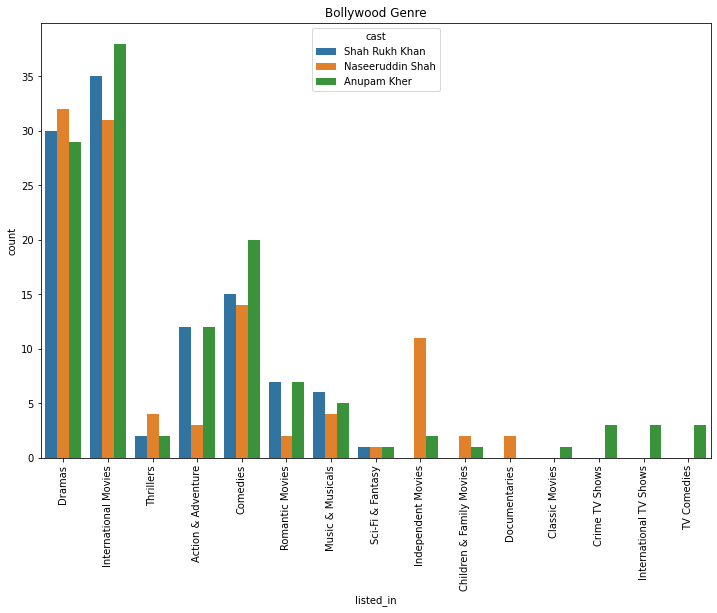

In [443]:
# we're fetching the records where the cast value is Shah Rukh Khan
srk = final_data.loc[final_data['cast'].str.contains('Shah Rukh Khan')]

# # we're fetching the records where the cast value is Naseeruddin Shah
ns = final_data.loc[final_data['cast'].str.contains('Naseeruddin Shah')]

# we're fetching the records where the cast value is Anupam Kher
ak = final_data.loc[final_data['cast'].str.contains('Anupam Kher')]

# we,re appending these records into first and applying ignore_index = True which will continue to sequence the index 
bollywood = srk.append(ns,ignore_index=True).append(ak,ignore_index=True)

# we're plotting the different genre's in which the above three actors / cast values are acted in
# setting the figure size to (12,8) where 12 being the width and 8 as height
plt.figure(figsize=(12,8))
plt.title('Bollywood Genre')
sns.countplot(x='listed_in',data=bollywood,hue='cast')
plt.xticks(rotation=90)
plt.show()


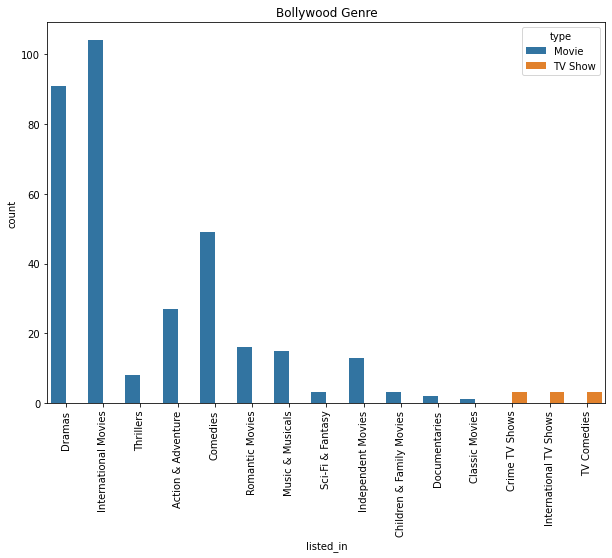

In [444]:
# we're plotting the different genre's corresponding to either TV Show or Movie
plt.figure(figsize=(10,7))
plt.title('Bollywood Genre')
sns.countplot(x='listed_in',data=bollywood,hue='type')
plt.xticks(rotation=90)
plt.show()

In [362]:
# we're grouping the type and listed_in column together and applying the value_counts() on the director column which will fetch the unique director data values
genre_director_group = final_data.groupby(['type','listed_in'])['director'].agg(count=('value_counts'))

genre_director = pd.DataFrame(genre_director_group)

# we're resetting the index as there was a multiIndex('type','listed_in','director')
genre_director.reset_index(inplace=True)

# fetching the top 10 listed_in data values count
genre_director['listed_in'].value_counts().head(10)

International Movies        2219
Dramas                      2034
Comedies                    1394
Documentaries                859
Independent Movies           787
Action & Adventure           705
Thrillers                    541
Children & Family Movies     538
Romantic Movies              531
Music & Musicals             348
Name: listed_in, dtype: int64

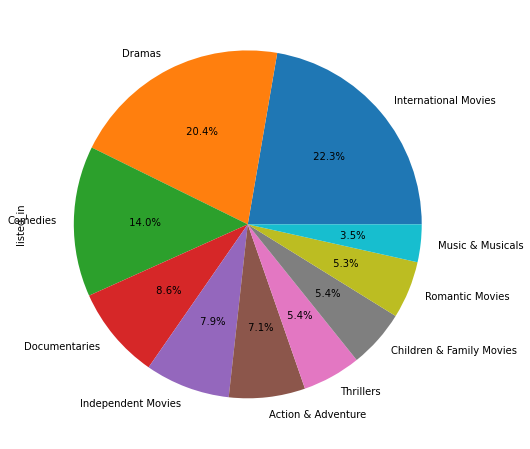

In [422]:
genre_count = genre_director['listed_in'].value_counts().reset_index()

plt.figure(figsize=(12,8))
# Univariate Analysis:
# we're plotting a pie plot for different genre's in the listed_in column
genre_director['listed_in'].value_counts().head(10).plot.pie(autopct='% 0.1f%%')
plt.show()

In [359]:
# we're grouping the type and listed_in column together and applying the nunique i.e, the unique scalar value for each director who worked for the type and listed_in group
director_count_genre = genre_director.groupby(['type','listed_in'])['director'].nunique().reset_index()

# we're the sorting the values in descending order across the director column
director_count_genre.sort_values('director',ascending=False,inplace=True)

# retrieving the top 20 records
director_genre = director_count_genre.head(20)

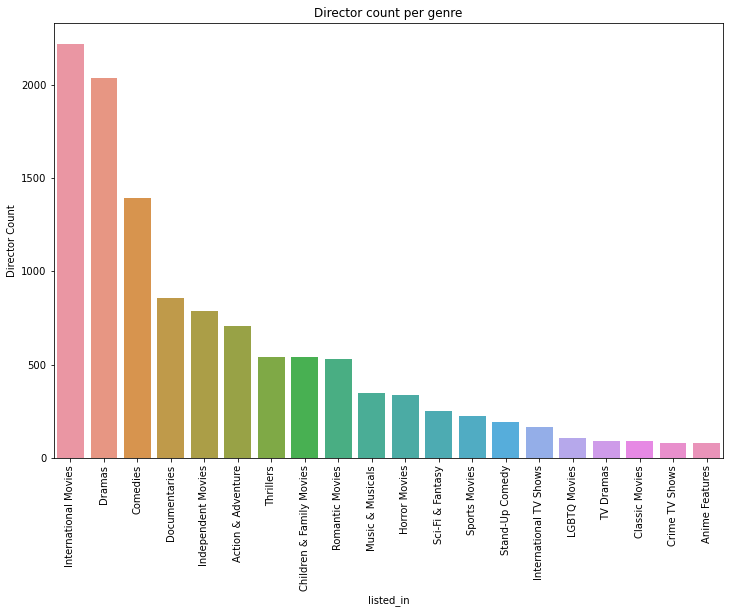

In [361]:
plt.figure(figsize=(12,8))

# we're labelling the title for figure
plt.title('Director count per genre')

# Bivariate Analysis:
# we're plotting the genre with the number of directors worked in respective listed_in data value
sns.barplot(x='listed_in',y='director',data=director_genre)

# we're rotating the xticks to 90 degree
plt.xticks(rotation=90)

# we're explicitly labelling the Y axis as the seaborn implicitlly labelled it as count so for better understanding we're labelling the Y axis
plt.ylabel('Director Count')

plt.show()

<AxesSubplot:xlabel='release_year', ylabel='Count'>

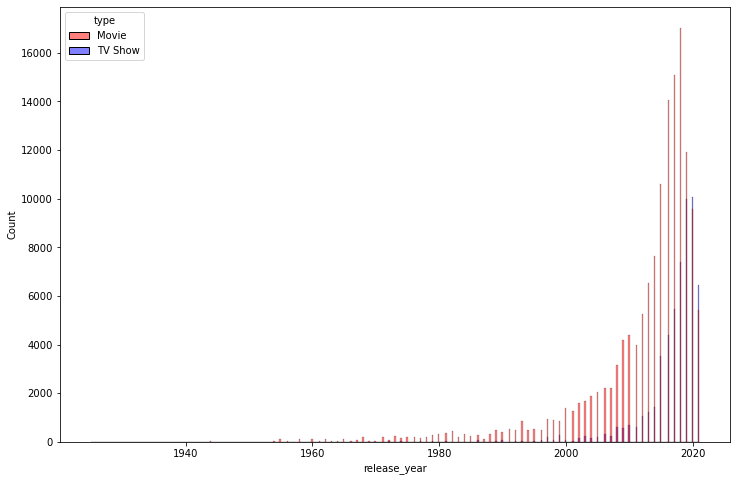

In [375]:
# we're looking here over the years which type data value either the Movie or the TV show is more focused
plt.figure(figsize=(12,8))
# Bivariate Analysis :
# we're plotting a histogram for the release_year column for different type value
sns.histplot(x='release_year',data=final_data,hue='type',palette=['red', 'blue'])


In [388]:
# we're looking for the TV show and the Movied across different countries with unique genre count value and renaming the resultant column as count
country_genre_data = final_data.groupby('country')['listed_in'].agg(count=('value_counts'))

# we're resetting the index as the resultant index was a multiIndex 
country_genre_data.reset_index(inplace=True)

# we're fetching the records in descending values of count
country_genre_data.sort_values('count',ascending = False)


,country,listed_in,count
1339,United States,Comedies,8385
1340,United States,Dramas,8173
513,India,International Movies,7059
514,India,Dramas,5569
1341,United States,Children & Family Movies,4888
...,...,...,...
310,Czech Republic,Science & Nature TV,1
311,Czech Republic,TV Horror,1
312,Czech Republic,TV Thrillers,1
332,Denmark,Docuseries,1


In [413]:
# we're fetching the top 3 country values
top3_country = final_data['country'].value_counts().head(3).index

# we're fetching the top 3 genre values
top3_genre = final_data['listed_in'].value_counts().head(3).index

# fetching the records where top 3 country and top 3 genre from the final data
top3_data = final_data.loc[(final_data['country'].isin(top3_country)) &
                              (final_data['listed_in'].isin(top3_genre))]
top3_data

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,month
179,Sankofa,Kofi Ghanaba,Haile Gerima,United States,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",September
181,Sankofa,Kofi Ghanaba,Haile Gerima,United States,International Movies,s8,Movie,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",September
188,Sankofa,Kofi Ghanaba,Haile Gerima,United Kingdom,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",September
190,Sankofa,Kofi Ghanaba,Haile Gerima,United Kingdom,International Movies,s8,Movie,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",September
197,Sankofa,Oyafunmike Ogunlano,Haile Gerima,United States,Dramas,s8,Movie,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201983,Zubaan,Malkeet Rauni,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201985,Zubaan,Anita Shabdish,Mozez Singh,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March


In [414]:
# we're grouping the country and applying the value_counts() on the listed_in column and renaming the resultant column as count
top3_data_grp = top3_data.groupby('country')['listed_in'].agg(count=('value_counts'))

# we're resetting the index as previously it was a multiIndex ['country','listed_in']
top3_data_grp.reset_index(inplace=True)

# we're sorting the records in descending order of count 
top3_data_grp.sort_values('count',ascending = False)

,country,listed_in,count
6,United States,Comedies,8385
7,United States,Dramas,8173
0,India,International Movies,7059
1,India,Dramas,5569
2,India,Comedies,2685
3,United Kingdom,Dramas,1939
8,United States,International Movies,1211
4,United Kingdom,International Movies,1189
5,United Kingdom,Comedies,975


<AxesSubplot:xlabel='country', ylabel='count'>

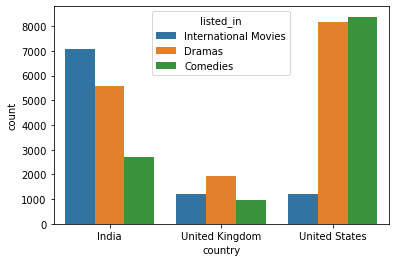

In [415]:
# Multivariate Analysis : 
# we're plotting a barplot on the top 3 data with x axis as country column and y axis as count and hue a categorical value of listed_in
sns.barplot(x='country',y='count',data=top3_data_grp,hue='listed_in')

<AxesSubplot:xlabel='country', ylabel='release_year'>

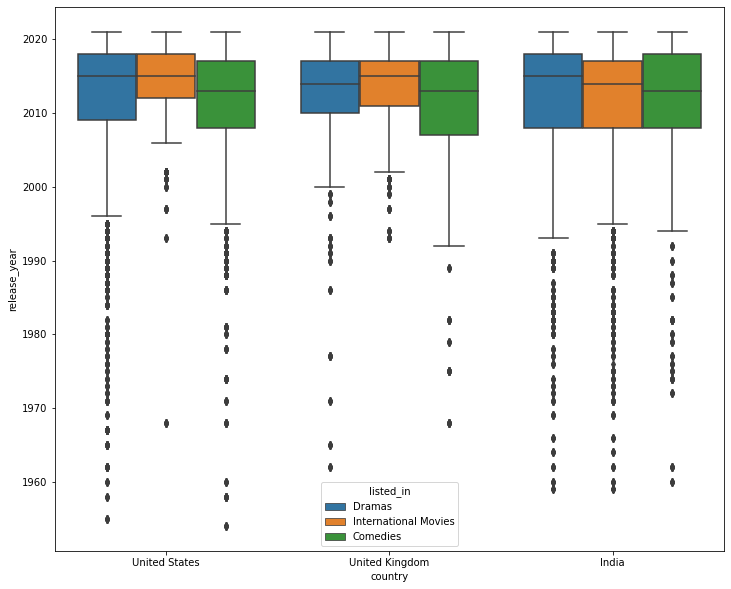

In [416]:
plt.figure(figsize=(12,10))
# Multivariate Analysis : 
# we're plotting a boxplot for country column and release_year column with a third variable as a categorical value of listed_in
sns.boxplot(x='country',y='release_year',data=top3_data,hue='listed_in')


<Figure size 864x576 with 0 Axes>

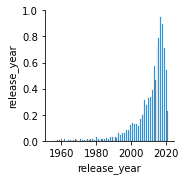

In [428]:
# we're plotting a pairplot to observe the corelation between the numerical/continuous value column.
# In the dataset we have only one numerical value column so the corelated value will be 1 as the plotting is done with itself
plt.figure(figsize=(12,8))
sns.pairplot(data=top3_data)

<AxesSubplot:>

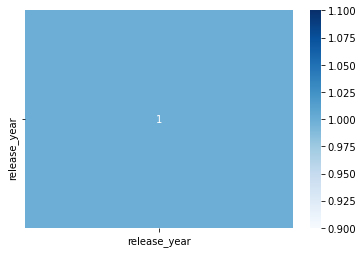

In [432]:
# Heatmap adds the color to correlated value and we have passed annot = True which will mention the correlation value inside the color
sns.heatmap(top3_data.corr(),cmap='Blues',annot = True)